[*********************100%%**********************]  1 of 1 completed
C:\Users\Rajan\AppData\Local\Temp\ipykernel_3504\3097613224.py:33: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Position'] = data['Signal'].replace(to_replace=0, method='ffill')  # Carry forward the position


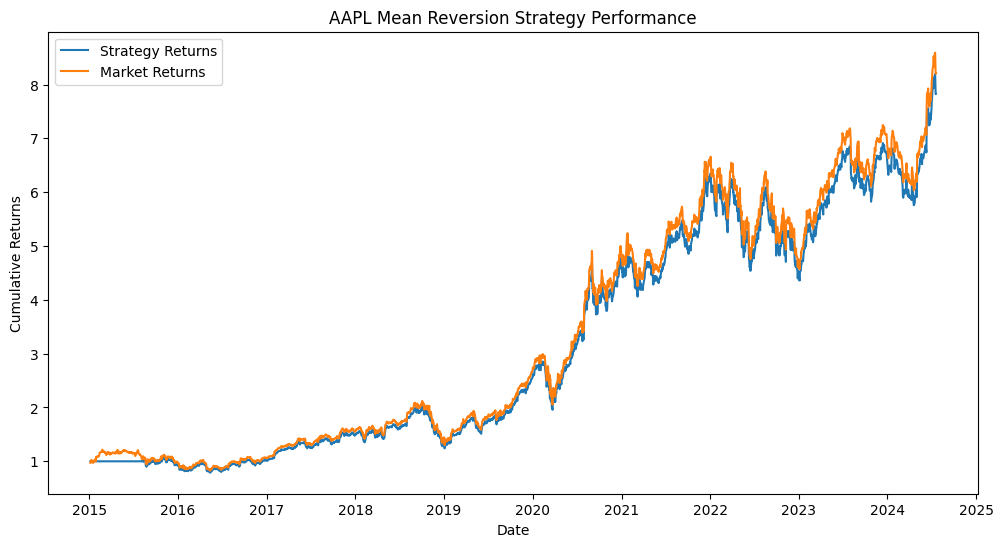

Final Cumulative Strategy Returns: 7.83
Final Cumulative Market Returns: 8.21


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for a stock (e.g., Apple)
symbol = 'AAPL'
data = yf.download(symbol, start='2015-01-01', end='2024-07-20')
data['Returns'] = data['Close'].pct_change()

# Parameters
window = 90  # Moving average window
z_entry_threshold = 3.80 # Entry Z-score threshold
z_exit_threshold = 1.75 # Exit Z-score threshold

# Calculate moving average and standard deviation
data['Moving_Avg'] = data['Close'].rolling(window=window).mean()
data['Std_Dev'] = data['Close'].rolling(window=window).std()

# Calculate Z-Score
data['Z_Score'] = (data['Close'] - data['Moving_Avg']) / data['Std_Dev']

# Initialize signals and positions
data['Signal'] = 0  # 1 for buy, -1 for sell
data['Position'] = 0  # Position of the strategy

# Generate buy and sell signals
data.loc[data['Z_Score'] < -z_entry_threshold, 'Signal'] = 1  # Buy signal
data.loc[data['Z_Score'] > z_entry_threshold, 'Signal'] = -1  # Sell signal
data.loc[data['Z_Score'].abs() < z_exit_threshold, 'Signal'] = 0  # Exit signal

# Calculate positions
data['Position'] = data['Signal'].replace(to_replace=0, method='ffill')  # Carry forward the position

# Calculate strategy returns
data['Strategy_Returns'] = data['Position'].shift(1) * data['Returns']

# Calculate cumulative returns
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()
data['Cumulative_Market_Returns'] = (1 + data['Returns']).cumprod()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.title(f'{symbol} Mean Reversion Strategy Performance')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print the final cumulative returns
print(f"Final Cumulative Strategy Returns: {data['Cumulative_Strategy_Returns'].iloc[-1]:.2f}")
print(f"Final Cumulative Market Returns: {data['Cumulative_Market_Returns'].iloc[-1]:.2f}")
